# Hexagonally periodic FFT Tutorial

The FFT for hexagonal periodicity corresponds to the case where the signal has been sampled on a hexagonal grid **and** has support on a **hexagonal** region on that grid.

It is not straightforward to represent such a region in a standard data structure. Therefore this FFT transform operates on square arrays. For a square array of a given size, we can inscribe a mask representing the largest hexagonal region that can fit. For an *N*x*N* square, the area of this region is always $\frac{3}{4} N^{2}$. Due to the structure of Mersereau's hexagonal FFT algorithm, $N$ must be a multiple of 4 for it to work.

We'll start by visualizing this region on both oblique and offset grids.

The `hexfft` function `hsupport` automatically computes this region for a given size.

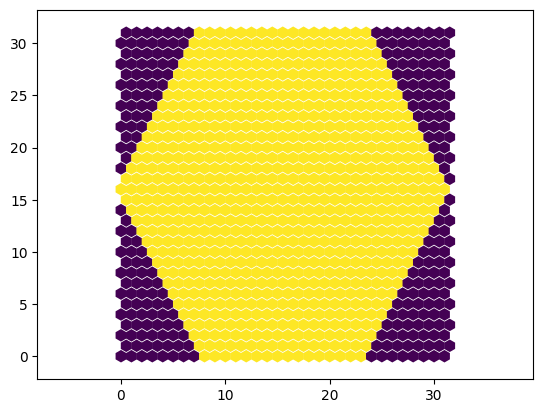

In [13]:
from hexfft import HexArray
from hexfft.plot import hexshow
from hexfft.utils import hsupport
import numpy as np

N = 32

mask = hsupport(N, "offset")
hexshow(HexArray(mask))


For an oblique array, the spacing and shape of the region is exactly the same, but with different indices:

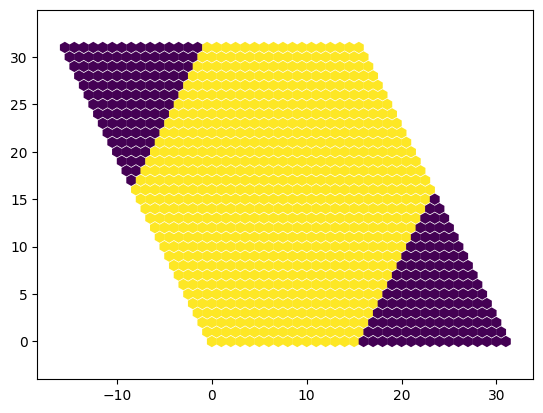

In [12]:
mask = hsupport(N, "oblique")
hexshow(HexArray(mask, "oblique"))

Any signal input to the FFT/IFFT with the "hex" option is masked to this region automatically. Let's look at an example.

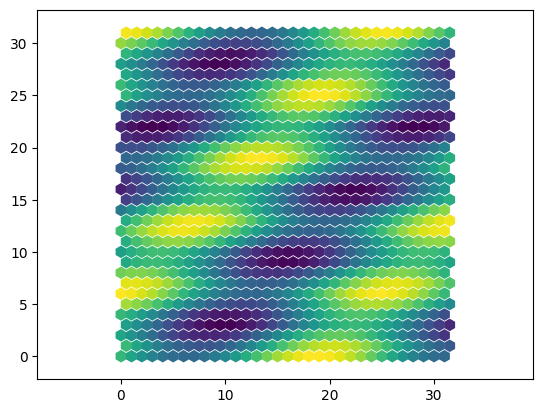

In [22]:
from hexfft.utils import nice_test_function

x = nice_test_function((N, N), hcrop=False, pattern="offset")
hexshow(x)

Taking the FFT and then the inverse transform back, we see that the hexagonal FFT only operates on data within this mask.

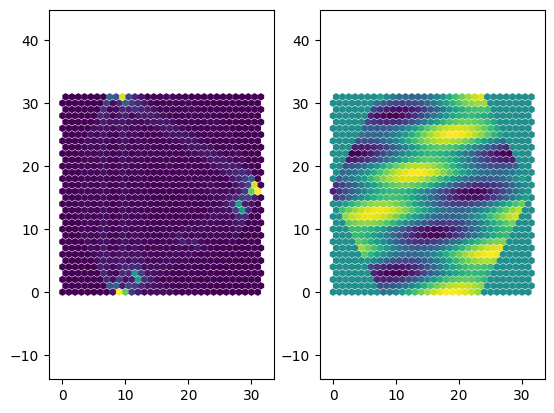

In [23]:
import matplotlib.pyplot as plt
from hexfft import fft, ifft

X = fft(x, "hex")
fig, ax = plt.subplots(1, 2)
hexshow(np.abs(X), ax=ax[0])

xx = ifft(X, "hex")

hexshow(np.real(xx), ax=ax[1])


This transform works equally well on oblique grids.



Text(0.5, 1.0, 'Inverse FT')

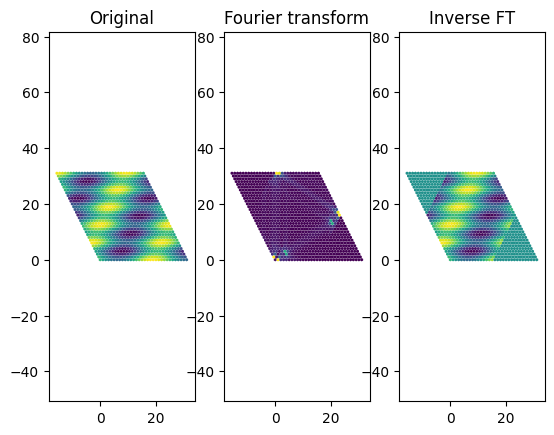

In [27]:
x = nice_test_function((N, N), hcrop=False, pattern="oblique")

fig, ax = plt.subplots(1, 3)
hexshow(x, ax=ax[0])
ax[0].set_title("Original")

X = fft(x, "hex")
hexshow(np.abs(X), ax=ax[1])
ax[1].set_title("Fourier transform")

xx = ifft(X, "hex")
hexshow(np.real(xx), ax=ax[2])
ax[2].set_title("Inverse FT")